# K-Means Clustering using scikit-learn in Python

#### Necessary library imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

#### Prepare the data

In [3]:
from sklearn.preprocessing import StandardScaler
X = iris.data[:, [2, 3]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Finding the optimal number of clusters

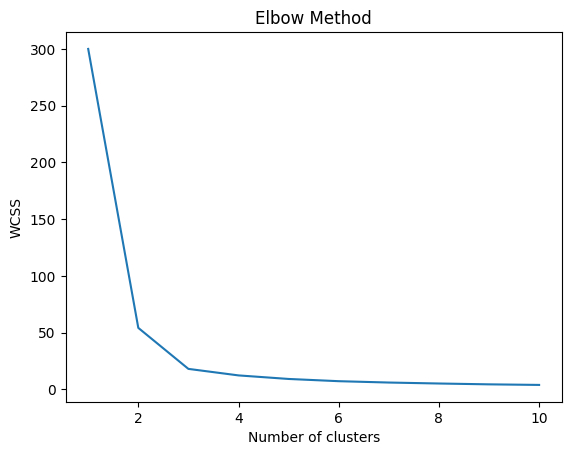

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

#### Apply the K-Means algorithm

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled) 

#### Visualize the Clusters

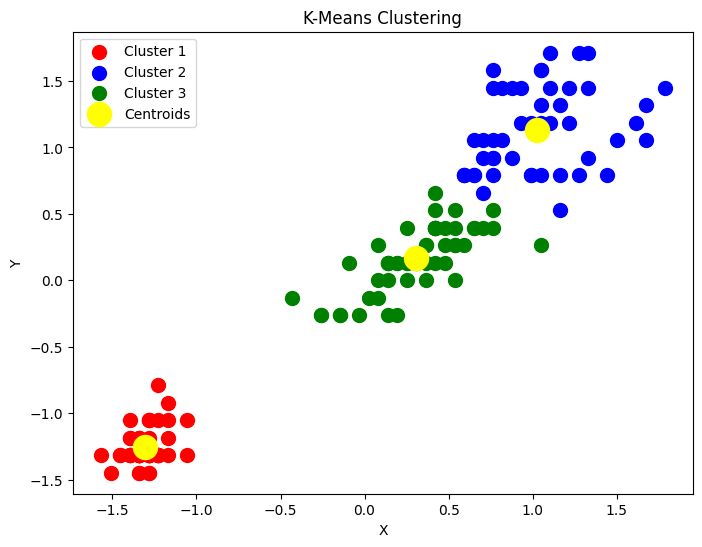

In [6]:
plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show() 